# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [2]:
Model=RandomForestClassifier()

# Original Data

In [3]:
daily_DMC=pd.read_csv("daily_DMC.csv")
daily_DMC.set_index(["Unnamed: 0"],inplace=True)

In [4]:
y=daily_DMC.pop("Drought_Level")
x=daily_DMC[["AWND","PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()

In [5]:
y.value_counts()

0.0    5222
1.0    1631
2.0     728
3.0     539
4.0     252
5.0      21
Name: Drought_Level, dtype: int64

<AxesSubplot:ylabel='Drought_Level'>

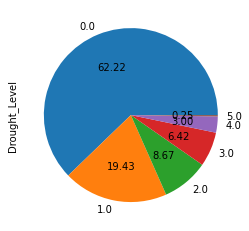

In [6]:
y.value_counts().plot.pie(autopct='%.2f')

In [7]:
train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=0.25,shuffle=False)

In [8]:
train_X_norm=preprocessing.normalize(train_X)
test_X_norm=preprocessing.normalize(test_X)

In [9]:
M1=Model
#M1.fit(train_X_norm,train_Y)
M1.fit(train_X,train_Y)

RandomForestClassifier()

In [10]:
#M1_prediction=M1.predict(test_X_norm)
M1_prediction=M1.predict(test_X)

In [11]:
ACC_1=accuracy_score(test_Y,M1_prediction)
print("Accuracy Score: %.2f" % ACC_1)
print(classification_report(test_Y,M1_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.61
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77      1463
         1.0       0.15      0.11      0.12       322
         2.0       0.18      0.03      0.05       202
         3.0       0.05      0.02      0.03       112

   micro avg       0.62      0.61      0.62      2099
   macro avg       0.27      0.25      0.24      2099
weighted avg       0.53      0.61      0.56      2099



# Random Undersampling

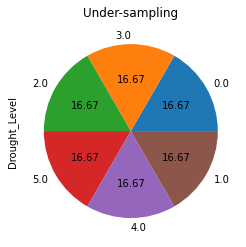

In [12]:
rus = RandomUnderSampler(sampling_strategy="not minority") # String
x_res, y_res = rus.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [13]:
y_res.value_counts()

0.0    21
3.0    21
2.0    21
5.0    21
4.0    21
1.0    21
Name: Drought_Level, dtype: int64

In [14]:
train_X_res,test_X_res,train_Y_res,test_Y_res=train_test_split(x_res,y_res,test_size=0.25,shuffle=False)

In [15]:
train_X_norm_res=preprocessing.normalize(train_X_res)
test_X_norm_res=preprocessing.normalize(test_X_res)

In [16]:
M2=Model
#M2.fit(train_X_norm_res,train_Y_res)
M2.fit(train_X_res,train_Y_res)

RandomForestClassifier()

In [17]:
#M2_prediction=M2.predict(test_X_norm)
M2_prediction=M2.predict(test_X)

In [18]:
ACC_2=accuracy_score(test_Y,M2_prediction)
print("Accuracy Score: %.2f" % ACC_2)
print(classification_report(test_Y,M2_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.28
              precision    recall  f1-score   support

         0.0       0.72      0.30      0.42      1463
         1.0       0.15      0.22      0.18       322
         2.0       0.12      0.30      0.17       202
         3.0       0.06      0.20      0.09       112

   micro avg       0.29      0.28      0.29      2099
   macro avg       0.26      0.25      0.21      2099
weighted avg       0.54      0.28      0.34      2099



# Random Oversampling

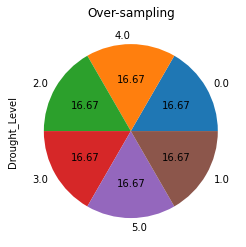

In [19]:
ros = RandomOverSampler(sampling_strategy="not majority")
x_ros, y_ros = ros.fit_resample(x, y)
ax = y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [20]:
y_ros.value_counts()

0.0    5222
4.0    5222
2.0    5222
3.0    5222
5.0    5222
1.0    5222
Name: Drought_Level, dtype: int64

In [21]:
train_X_ros,test_X_ros,train_Y_ros,test_Y_ros=train_test_split(x_ros,y_ros,test_size=0.25,shuffle=False)

In [22]:
train_X_norm_ros=preprocessing.normalize(train_X_ros)
test_X_norm_ros=preprocessing.normalize(test_X_ros)

In [23]:
M3=Model
#M3.fit(train_X_norm_ros,train_Y_ros)
M3.fit(train_X_ros,train_Y_ros)

RandomForestClassifier()

In [24]:
#M3_prediction=M3.predict(test_X_norm)
M3_prediction=M3.predict(test_X)

In [25]:
ACC_3=accuracy_score(test_Y,M3_prediction)
print("Accuracy Score: %.2f" % ACC_3)
print(classification_report(test_Y,M3_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.98
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1463
         1.0       0.96      0.99      0.97       322
         2.0       0.96      0.99      0.98       202
         3.0       0.92      1.00      0.96       112

   micro avg       0.98      0.98      0.98      2099
   macro avg       0.96      0.99      0.97      2099
weighted avg       0.99      0.98      0.98      2099



# Synthetic Minority Oversampling Technique (SMOTE)

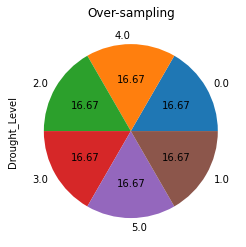

In [26]:
SMT = SMOTE()
x_smt, y_smt = SMT.fit_resample(x, y)
ax = y_smt.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [27]:
y_smt.value_counts()

0.0    5222
4.0    5222
2.0    5222
3.0    5222
5.0    5222
1.0    5222
Name: Drought_Level, dtype: int64

In [28]:
train_X_smt,test_X_smt,train_Y_smt,test_Y_smt=train_test_split(x_smt,y_smt,test_size=0.25,shuffle=False)

In [29]:
train_X_norm_smt=preprocessing.normalize(train_X_smt)
test_X_norm_smt=preprocessing.normalize(test_X_smt)

In [30]:
M4=Model
#M4.fit(train_X_norm_smt,train_Y_smt)
M4.fit(train_X_smt,train_Y_smt)

RandomForestClassifier()

In [31]:
#M4_prediction=M4.predict(test_X_norm)
M4_prediction=M4.predict(test_X)

In [32]:
ACC_4=accuracy_score(test_Y,M4_prediction)
print("Accuracy Score: %.2f" % ACC_4)
print(classification_report(test_Y,M4_prediction,labels=np.unique(test_Y)))

Accuracy Score: 0.98
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1463
         1.0       0.96      0.97      0.97       322
         2.0       0.98      0.98      0.98       202
         3.0       0.92      0.99      0.95       112

   micro avg       0.98      0.98      0.98      2099
   macro avg       0.96      0.98      0.97      2099
weighted avg       0.98      0.98      0.98      2099



# Metrics

In [33]:
summary = pd.DataFrame({'Type':['Original', 'Random Undersampling', 'Random Oversampling','SMOTE'],
                   'Accuracy Score':[ACC_1, ACC_2, ACC_3, ACC_4]})
summary

,Type,Accuracy Score
0,Original,0.613149
1,Random Undersampling,0.282992
2,Random Oversampling,0.982849
3,SMOTE,0.980943


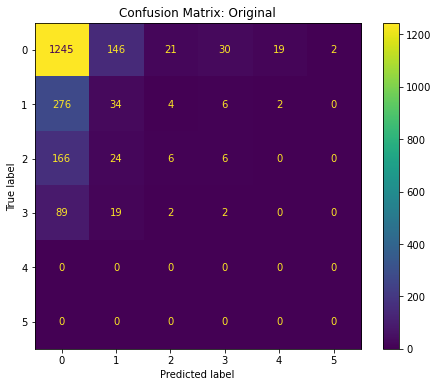

In [34]:
confusion_matrix = metrics.confusion_matrix(test_Y, M1_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: Original')
cm_display.plot(ax=ax)
plt.show()

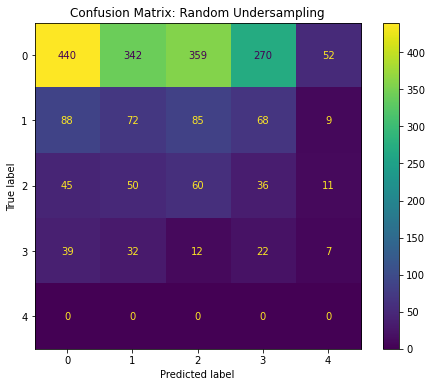

In [35]:
confusion_matrix = metrics.confusion_matrix(test_Y, M2_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: Random Undersampling')
cm_display.plot(ax=ax)
plt.show()

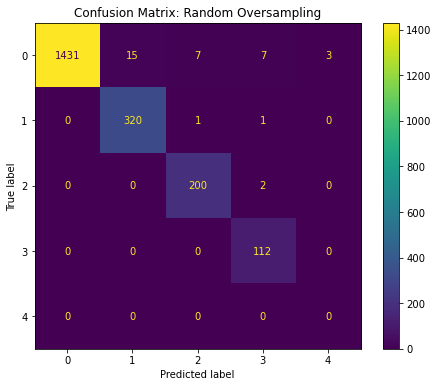

In [36]:
confusion_matrix = metrics.confusion_matrix(test_Y, M3_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: Random Oversampling')
cm_display.plot(ax=ax)
plt.show()

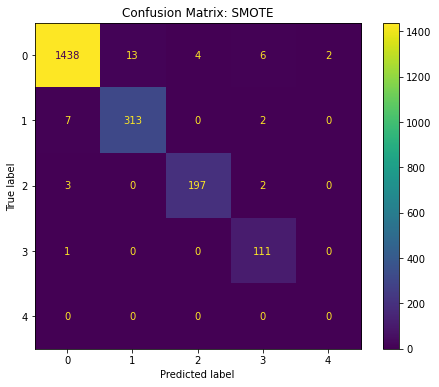

In [37]:
confusion_matrix = metrics.confusion_matrix(test_Y, M4_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
ax.set(title='Confusion Matrix: SMOTE')
cm_display.plot(ax=ax)
plt.show()